<a href="https://colab.research.google.com/github/vidorc/PyTorch-for-Deep-Learning-A-Comprehensive-Study-Guide/blob/main/02_PyTroch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
torch.__version__

'2.6.0+cu124'

In [230]:
weight = 0.7
bais = 0.3

In [231]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bais
X[:10], y[:10], len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [232]:
len(X), len(y)

(50, 50)

In [233]:
train_split = int(0.8*len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]


In [234]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [235]:
def plt_prediction(train_data=X_train,
                   train_label=y_train,
                   test_data=X_test,
                   test_label=y_test,
                   prediction=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if prediction is not None:
        plt.scatter(test_data, prediction, c="r", s=4, label="Predictions")

    plt.legend(loc="best")
    plt.show()

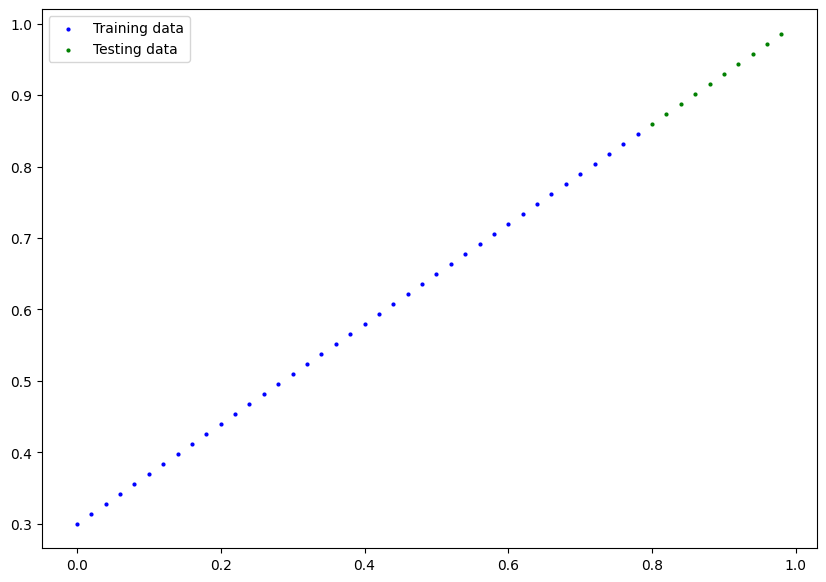

In [236]:
plt_prediction()

In [237]:
class LinearRegressionModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bais = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    def forward (self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bais

In [238]:
torch.manual_seed(43)
model_0 = LinearRegressionModelV1()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [239]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6484])), ('bais', tensor([-0.7058]))])

In [240]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[-1.2246],
        [-1.2375],
        [-1.2505],
        [-1.2635],
        [-1.2764],
        [-1.2894],
        [-1.3024],
        [-1.3153],
        [-1.3283],
        [-1.3413]])

In [241]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [242]:
X_test


tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

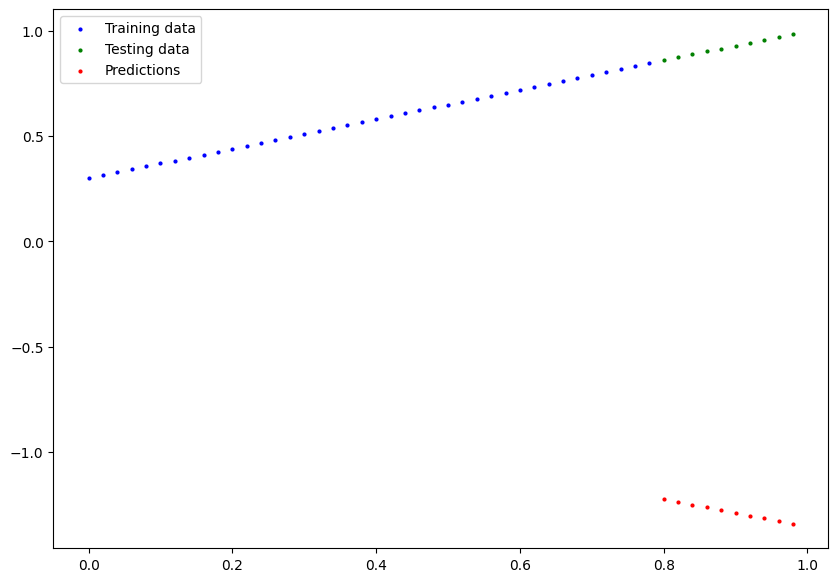

In [243]:
plt_prediction(prediction=y_preds)

In [244]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [245]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[-1.2246],
        [-1.2375],
        [-1.2505],
        [-1.2635],
        [-1.2764],
        [-1.2894],
        [-1.3024],
        [-1.3153],
        [-1.3283],
        [-1.3413]])

In [256]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.3796185553073883 | MAE Test Loss: 0.8453486561775208 
Epoch: 10 | MAE Train Loss: 0.2882431149482727 | MAE Test Loss: 0.7259945869445801 
Epoch: 20 | MAE Train Loss: 0.23128218948841095 | MAE Test Loss: 0.6293405294418335 
Epoch: 30 | MAE Train Loss: 0.19670966267585754 | MAE Test Loss: 0.5527852177619934 
Epoch: 40 | MAE Train Loss: 0.1756475865840912 | MAE Test Loss: 0.4931134283542633 
Epoch: 50 | MAE Train Loss: 0.1628715693950653 | MAE Test Loss: 0.44654950499534607 
Epoch: 60 | MAE Train Loss: 0.15468016266822815 | MAE Test Loss: 0.41154876351356506 
Epoch: 70 | MAE Train Loss: 0.14885053038597107 | MAE Test Loss: 0.3844168484210968 
Epoch: 80 | MAE Train Loss: 0.14416635036468506 | MAE Test Loss: 0.3626020550727844 
Epoch: 90 | MAE Train Loss: 0.14016637206077576 | MAE Test Loss: 0.3448020815849304 


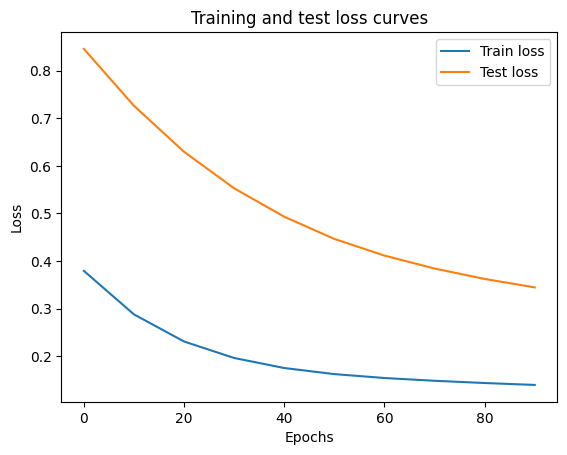

In [257]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [248]:
y_preds_new = model_0(X_test)

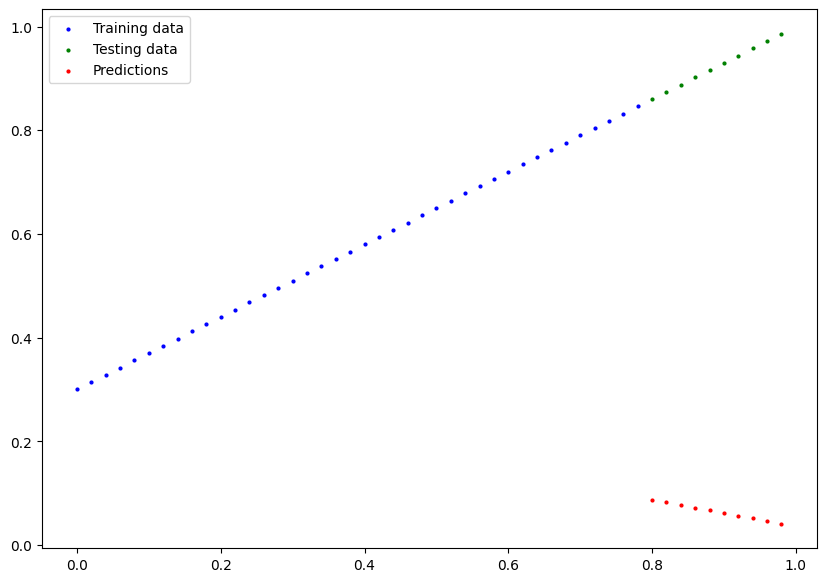

In [258]:
plt_prediction(prediction=y_preds_new.detach().cpu().numpy())


In [250]:
y_pred_new = model_0(X_test)

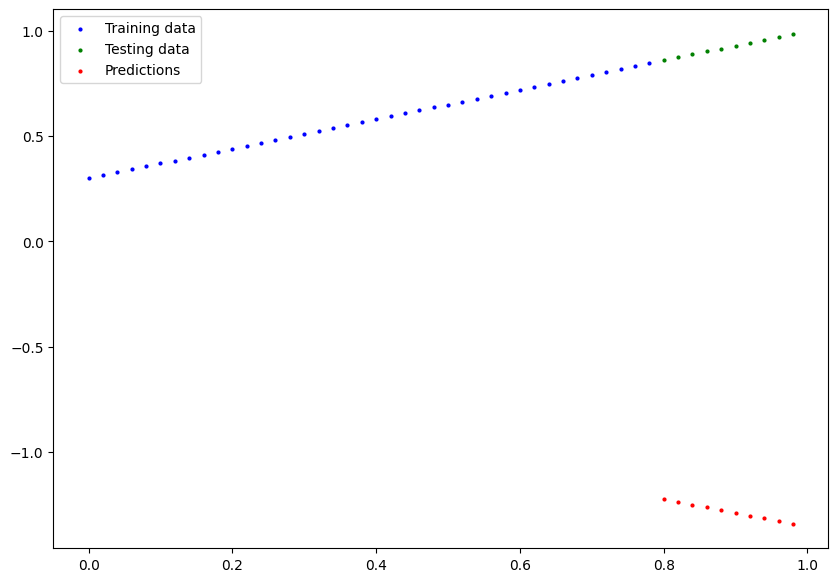

In [259]:
plt_prediction(prediction=y_preds)

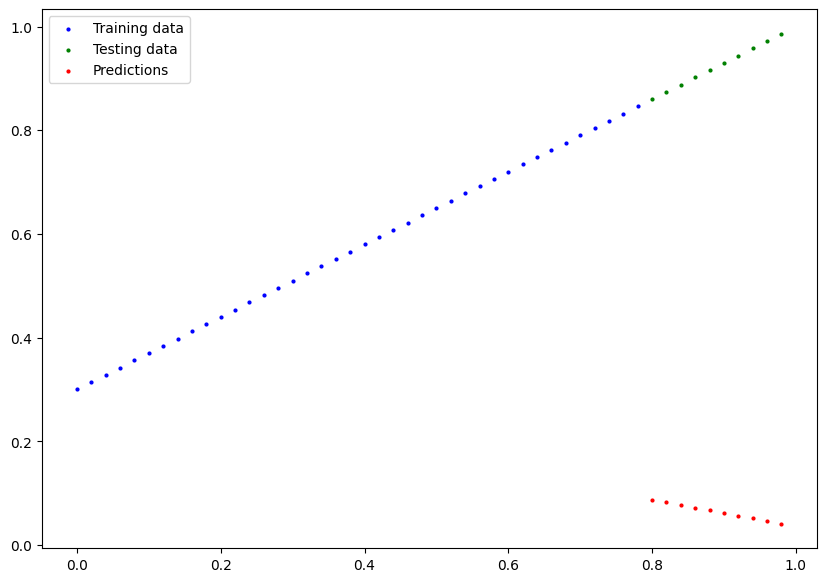

In [260]:
plt_prediction(prediction=y_pred_new.detach().cpu().numpy())

In [253]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([1.5317179 , 1.416508  , 1.301298  , 1.1860883 , 1.0708784 ,
        0.95566845, 0.8404584 , 0.7252484 , 0.61003846, 0.49482852],
       dtype=float32),
 [array(2.1924472, dtype=float32),
  array(2.0577376, dtype=float32),
  array(1.9230278, dtype=float32),
  array(1.788318, dtype=float32),
  array(1.6536081, dtype=float32),
  array(1.5188981, dtype=float32),
  array(1.3841883, dtype=float32),
  array(1.2494783, dtype=float32),
  array(1.1147684, dtype=float32),
  array(0.9800585, dtype=float32)])

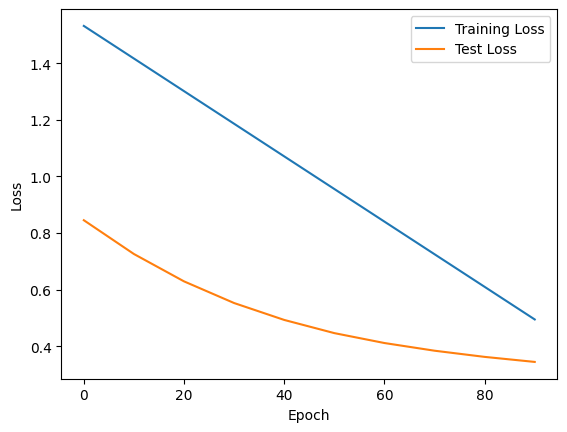

In [261]:
plt.plot(epoch_count, loss_values, label='Training Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()